In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('news.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [4]:
df.shape

(6335, 3)

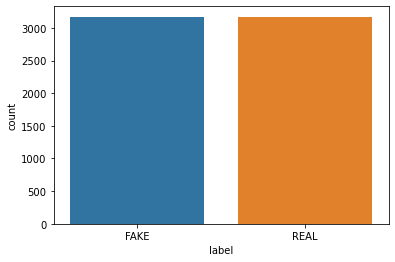

In [5]:
sns.countplot(df['label'])

In [6]:
X_train,X_test,y_train,y_test=train_test_split(df['text'],df['label'],test_size=0.2)

In [7]:
tf=TfidfVectorizer(stop_words='english',max_df=0.7)
tf_train=tf.fit_transform(X_train)
tf_test=tf.transform(X_test)

In [13]:
encoder=LabelEncoder();
y_train=encoder.fit_transform(y_train)
y_test=encoder.transform(y_test)

In [30]:
logistic=LogisticRegression(C=0.2,max_iter=1000)
logistic.fit(tf_train,y_train)
logistic.score(tf_train,y_train),logistic.score(tf_test,y_test)

(0.9027229676400947, 0.8752959747434885)

In [31]:
logistic=RandomForestClassifier()
logistic.fit(tf_train,y_train)
logistic.score(tf_train,y_train),logistic.score(tf_test,y_test)

(1.0, 0.8831886345698501)

In [42]:
logistic=DecisionTreeClassifier(ccp_alpha=0.002)
logistic.fit(tf_train,y_train)
logistic.score(tf_train,y_train),logistic.score(tf_test,y_test)

(0.8555643251775849, 0.7868981846882399)

In [44]:
logistic=SVC(C=10)
logistic.fit(tf_train,y_train)
logistic.score(tf_train,y_train),logistic.score(tf_test,y_test)

(1.0, 0.9352801894238358)

In [43]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [20]:
y_pred=pac.predict(tf_test)
score=accuracy_score(y_test,y_pred)
score,pac.score(tf_train,y_train)

(0.9368587213891081, 1.0)

In [10]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[593,  34],
       [ 44, 596]], dtype=int64)

In [11]:
np.unique(df['label'],return_counts=True)

(array(['FAKE', 'REAL'], dtype=object), array([3164, 3171], dtype=int64))

In [47]:
import pandas_profiling

In [48]:
pandas_profiling.ProfileReport(df)